# Importing The Libraries

In [1]:
# Core Libraries.
import pandas as pd
import numpy as np
import datetime as dt

#Visualization
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Precison Handling settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 160)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import import_ipynb
from function import *

importing Jupyter notebook from function.ipynb


# Loading and Reading the Dataset 

In [2]:
RFMT = pd.read_csv(r"C:\Users\HP\OneDrive - National Economics University\Study NEU\DBA\Project 2\dataset\RFMT.csv")
RFMT.head()

,Customer ID,Recency,Frequency,Monetary,Interpurchase_Time
0,12346.000,325,12,745.700,33
1,12347.000,2,8,4921.530,50
2,12348.000,75,5,1991.860,72
3,12349.000,18,4,3786.500,142
4,12352.000,36,10,2098.940,35


# Overview of Dataset

In [3]:
data_overview2(RFMT, head=5)

------------------------------------------------------ SHAPE OF DATASET -----------------------------------------------------
Shape of Dataset: (4255, 5)
----------------------------------------------------------DATA TYPES---------------------------------------------------------
int64      3
float64    2
Name: count, dtype: int64
----------------------------------------------------------DATA INFO----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4255 entries, 0 to 4254
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         4255 non-null   float64
 1   Recency             4255 non-null   int64  
 2   Frequency           4255 non-null   int64  
 3   Monetary            4255 non-null   float64
 4   Interpurchase_Time  4255 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 166.3 KB
None


# Modelling

## Modelling with KMeans Algorithm

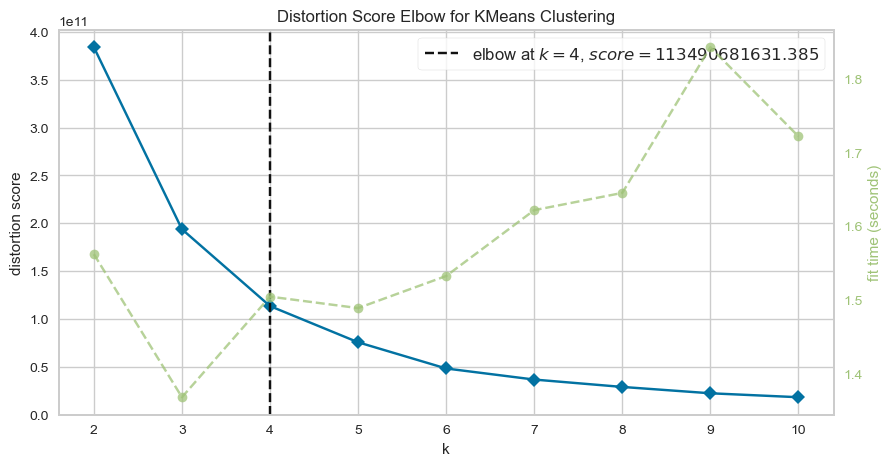

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
# Finding initial K value using Elbow Method
plt.figure(figsize=(10,5))
ax = plt.axes()
Elbow_M = KElbowVisualizer(KMeans(), k=10) 
Elbow_M.fit(RFMT)
Elbow_M.show()

**Therefore K = 4**.

For n_clusters = 2 The average silhouette_score is : 0.9813542692520871
For n_clusters = 3 The average silhouette_score is : 0.939054419112699
For n_clusters = 4 The average silhouette_score is : 0.8710608356122876
For n_clusters = 5 The average silhouette_score is : 0.7254707823834448


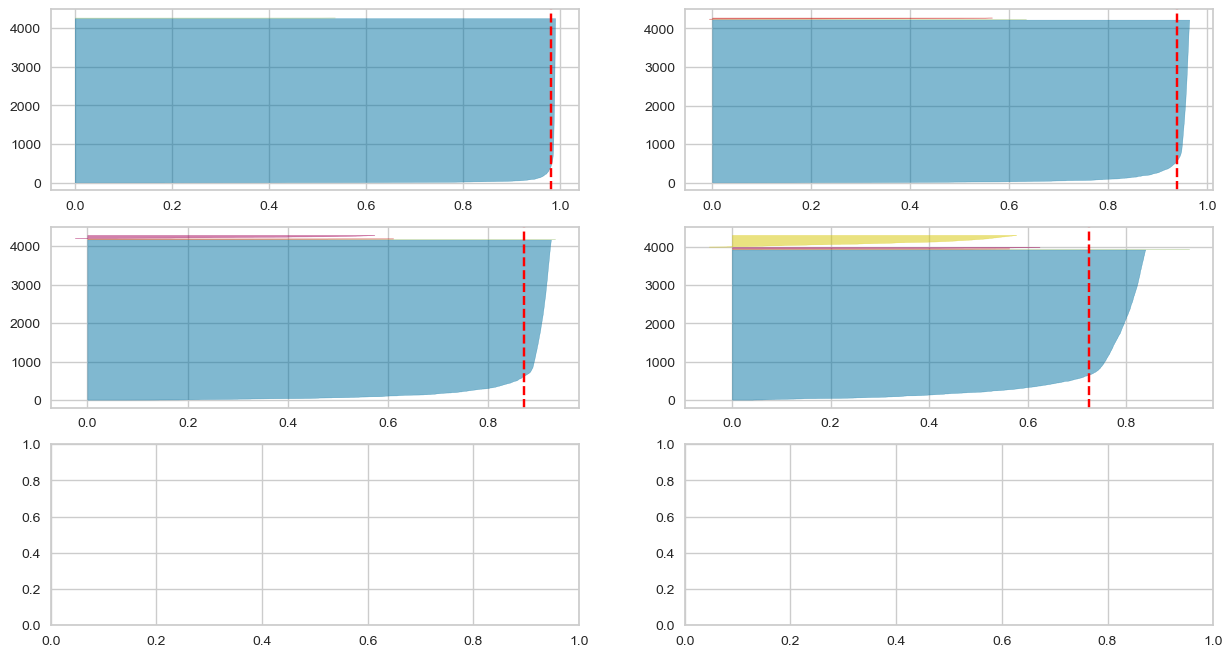

In [5]:
compute_silhouette_scores(RFMT)

In [6]:
# Fitting KMeans Model

kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(RFMT)

KMeans(max_iter=50, n_clusters=4)

In [7]:
RFMT["Clusters"]=kmeans.labels_
RFMT.head()

,Customer ID,Recency,Frequency,Monetary,Interpurchase_Time,Clusters
0,12346.000,325,12,745.700,33,0
1,12347.000,2,8,4921.530,50,0
2,12348.000,75,5,1991.860,72,0
3,12349.000,18,4,3786.500,142,0
4,12352.000,36,10,2098.940,35,0


# Evaluation

In [8]:
kmeans.cluster_centers_

array([[1.53159642e+04, 1.44706872e+02, 7.01753964e+00, 2.42744928e+03,
        7.00689572e+01],
       [1.63740000e+04, 5.00000000e-01, 1.48500000e+02, 5.22924278e+05,
        4.50000000e+00],
       [1.50282000e+04, 5.60000000e+00, 1.42900000e+02, 1.75188549e+05,
        7.10000000e+00],
       [1.50036173e+04, 3.28024691e+01, 5.45185185e+01, 3.60880413e+04,
        1.85308642e+01]])

In [9]:
# grouping the data in accorandance with each cluster seperately
one = RFMT[RFMT["Clusters"]==0]
two = RFMT[RFMT["Clusters"]==1]
three = RFMT[RFMT["Clusters"]==2]
four = RFMT[RFMT["Clusters"]==3]

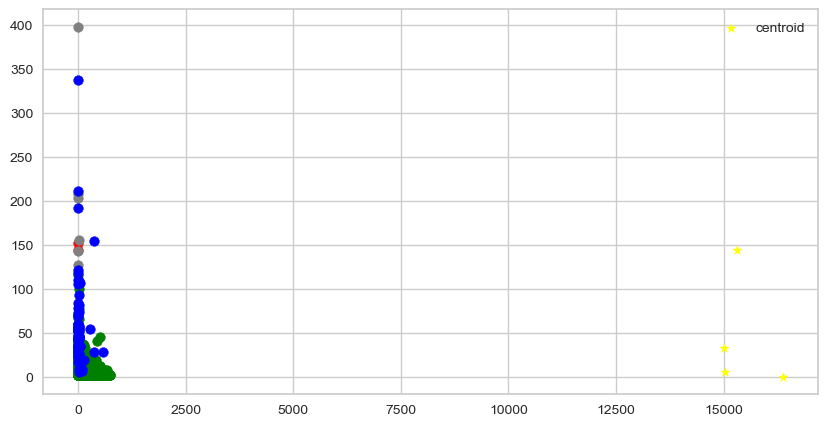

In [10]:
#Checking the quality of clustering in the data set

plot_clusters(one, two, three, four, kmeans)

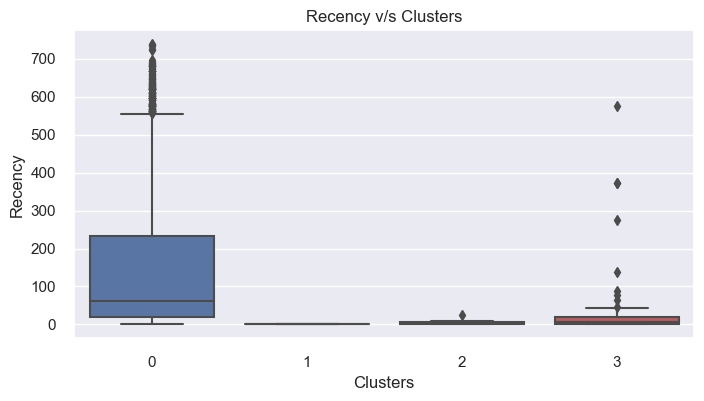

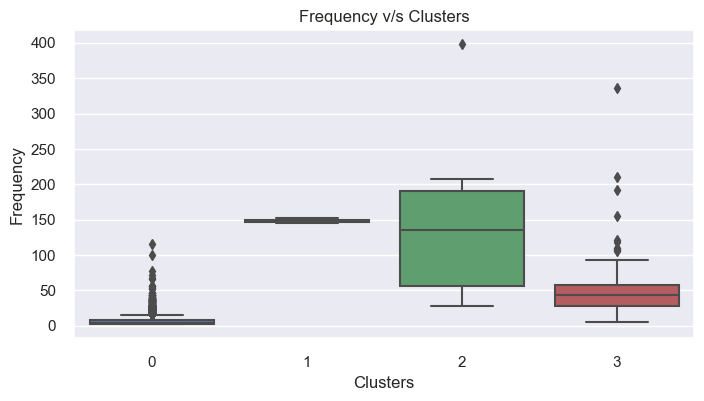

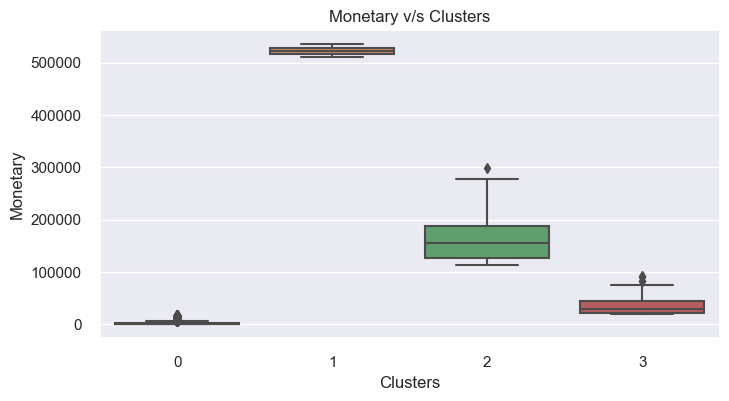

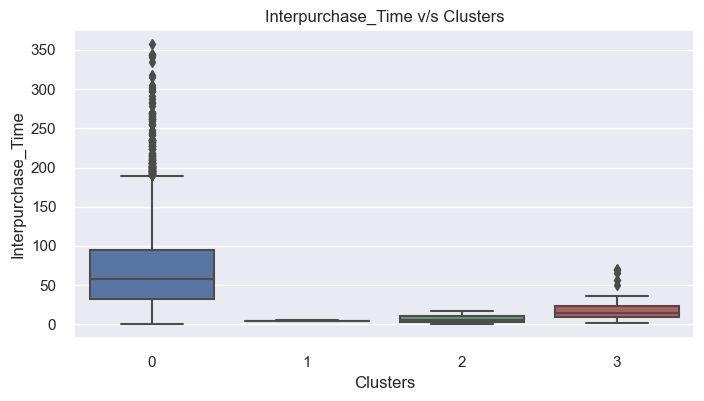

In [11]:
lists = ['Recency', 'Frequency', 'Monetary', 'Interpurchase_Time']

plot_metrics_vs_clusters(RFMT, lists)

### Silhouette Coefficient (silhouette score)

*Silhouette Coefficient* or *silhouette score* is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. Score closer to 1, higher the cluster distinguished.

In [12]:
print_silhouette_scores(RFMT, kmeans.labels_, metrics)

Silhouette score with euclidean metric: 0.8710608365167134
Silhouette score with manhattan metric: 0.8483960165000729
Silhouette score with cosine metric: 0.8802942821136523
Silhouette score with chebyshev metric: 0.8789551402448619
Silhouette score with minkowski metric: 0.8710608365167134
Silhouette score with sqeuclidean metric: 0.9664938236398785
Silhouette score with seuclidean metric: 0.7314117677254419
Silhouette score with mahalanobis metric: 0.7139684429825361
Silhouette score with correlation metric: 0.8872177174395846


# Segment Visualization

In [13]:
# Lets create bins and assign scores for rfm value
bins1 = np.linspace(RFMT["Recency"].min(), RFMT["Recency"].max(),6)
RFMT["r_score"] = pd.cut(RFMT["Recency"],bins1,labels=[5,4,3,2,1],include_lowest=True)

bins2 = np.linspace(RFMT["Frequency"].min(),RFMT["Frequency"].max(),6)
RFMT["f_score"] = pd.cut(RFMT["Frequency"],bins2,labels=[1,2,3,4,5],include_lowest=True)

bins3 = np.linspace(RFMT["Monetary"].min(),RFMT["Monetary"].max(),6)
RFMT["m_score"] = pd.cut(RFMT["Monetary"],bins3,labels=[1,2,3,4,5],include_lowest=True)

bins4 = np.linspace(RFMT["Interpurchase_Time"].min(),RFMT["Interpurchase_Time"].max(),6)
RFMT["t_score"] = pd.cut(RFMT["Interpurchase_Time"],bins4,labels=[1,2,3,4,5],include_lowest=True)

RFMT["RFMT SCORE"] = RFMT["r_score"].astype(str) + RFMT["f_score"].astype(str)
RFMT.head()

,Customer ID,Recency,Frequency,Monetary,Interpurchase_Time,Clusters,r_score,f_score,m_score,t_score,RFMT SCORE
0,12346.000,325,12,745.700,33,0,3,1,1,1,31
1,12347.000,2,8,4921.530,50,0,5,1,1,1,51
2,12348.000,75,5,1991.860,72,0,5,1,1,2,51
3,12349.000,18,4,3786.500,142,0,5,1,1,2,51
4,12352.000,36,10,2098.940,35,0,5,1,1,1,51


In [14]:
# creating dictionary to name each segments
dict_seg = {r'[1-2][1-2]': 'hibernating',
            r'[1-2][3-4]': 'at_Risk',
            r'[1-2]5': 'cant_loose',
            r'3[1-2]': 'about_to_sleep',
            r'33': 'need_attention',
            r'[3-4][4-5]': 'loyal_customers',
            r'41': 'promising',
            r'51': 'new_customers',
            r'[4-5][2-3]': 'potential_loyalists',
            r'5[4-5]': 'champions'}

RFMT['Segment'] = RFMT['RFMT SCORE'].replace(dict_seg, regex = True)
RFMT['Segment'] = RFMT['RFMT SCORE'].replace(dict_seg, regex = True) 
RFMT.head()

,Customer ID,Recency,Frequency,Monetary,Interpurchase_Time,Clusters,r_score,f_score,m_score,t_score,RFMT SCORE,Segment
0,12346.000,325,12,745.700,33,0,3,1,1,1,31,about_to_sleep
1,12347.000,2,8,4921.530,50,0,5,1,1,1,51,new_customers
2,12348.000,75,5,1991.860,72,0,5,1,1,2,51,new_customers
3,12349.000,18,4,3786.500,142,0,5,1,1,2,51,new_customers
4,12352.000,36,10,2098.940,35,0,5,1,1,1,51,new_customers


In [15]:
# Segregate dataframe w.r.t its cluster

c1 = RFMT[RFMT["Clusters"]==0]
c2 = RFMT[RFMT["Clusters"]==1]
c3 = RFMT[RFMT["Clusters"]==2]
c4 = RFMT[RFMT["Clusters"]==3]

<string>:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
<string>:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


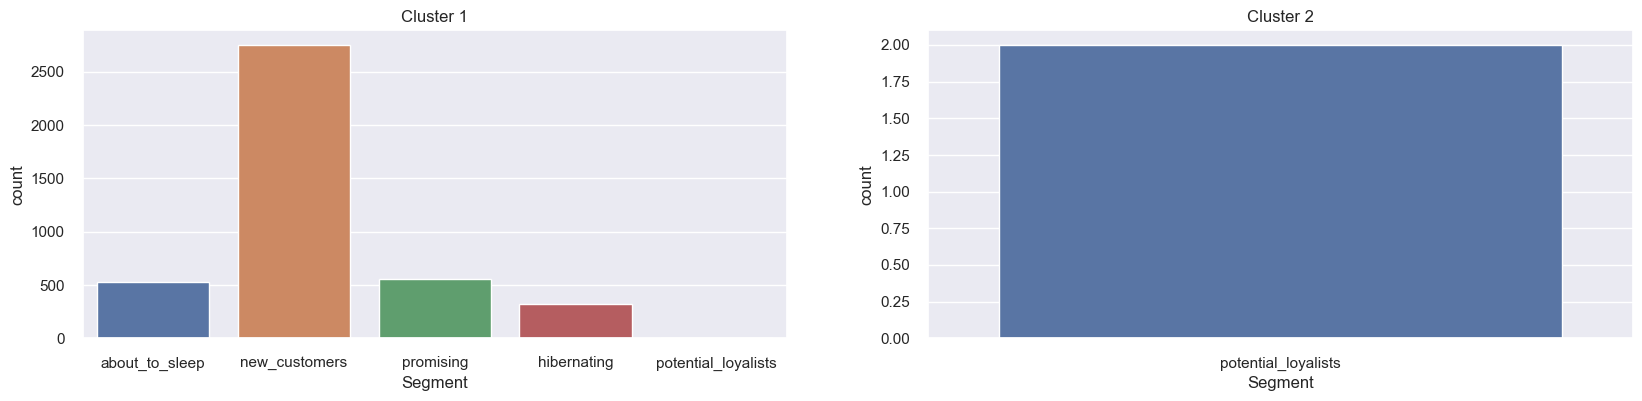

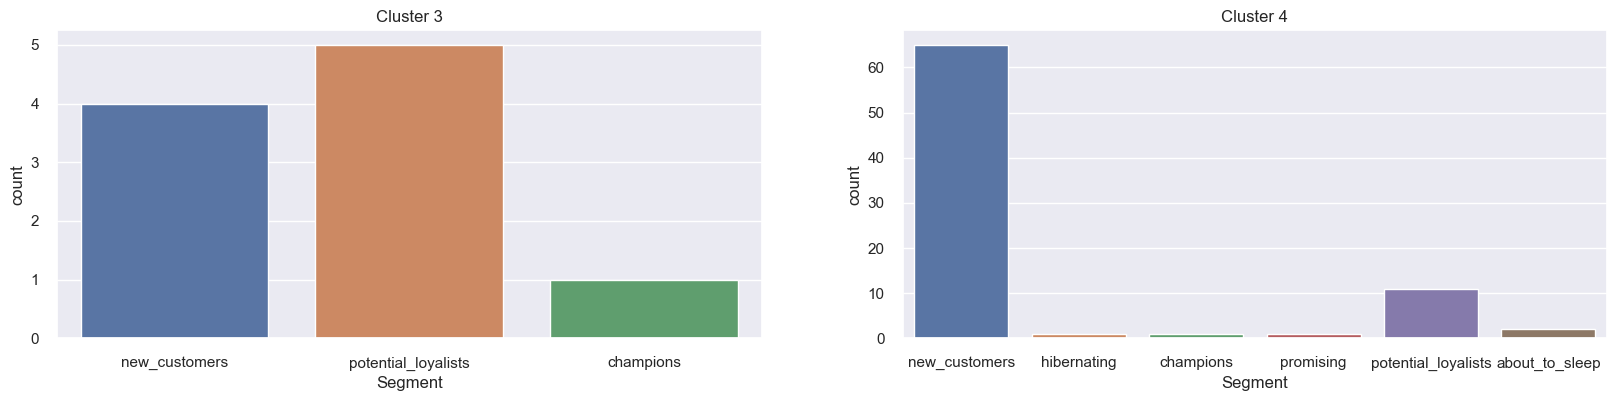

In [16]:
clusters = [c1, c2, c3, c4]
titles = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]
plot_segment_counts(clusters, titles)